In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [2]:
x=np.arange(0,100,0.1)
y=0.5*np.sin(2*x)-np.cos(x/2.0) #1000개 시계열 데이터

In [4]:
seq_data = y.reshape(-1,1)

print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]]


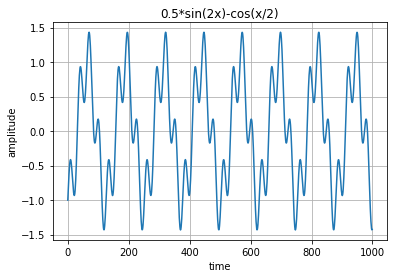

In [5]:
plt.grid()
plt.title('0.5*sin(2x)-cos(x/2)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

In [8]:
def seq2dataset(seq, window, horizon):
    X= []
    Y= []
    for i in range(len(seq)-(window+horizon)+1):
        x= seq[i:(i+window)] # 슬라이싱을 이용해 [[][] ] 식으로 x데이터 생성
        y= (seq[i+window+horizon-1])
        
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y) # 2차원행렬을 3차원 텐서로 변환되어 리턴

In [9]:
w = 20 #window size
h = 1 #horizon factor
X, Y = seq2dataset(seq_data, w, h)
print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [10]:
split_ratio = 0.8

split = int(split_ratio*len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [14]:
model = Sequential()
model.add(SimpleRNN(units=128,activation='tanh',input_shape=(20,1)))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam',metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 128)               16640     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [16]:
# from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime

start_time = datetime.now()
hist = model.fit(x_train, y_train,epochs=100,validation_data=(x_test,y_test))
end_time = datetime.now()

print('Elapsed Time => ' , end_time-start_time)

Epoch 1/100
25/25 [==============================] - 1s 13ms/step - loss: 0.0747 - mae: 0.1869 - val_loss: 0.0075 - val_mae: 0.0720
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0035 - mae: 0.0477 - val_loss: 0.0014 - val_mae: 0.0311
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0011 - mae: 0.0259 - val_loss: 6.2155e-04 - val_mae: 0.0193
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 5.2890e-04 - mae: 0.0183 - val_loss: 4.5017e-04 - val_mae: 0.0154
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 3.9813e-04 - mae: 0.0158 - val_loss: 2.2984e-04 - val_mae: 0.0121
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 2.0905e-04 - mae: 0.0114 - val_loss: 1.3993e-04 - val_mae: 0.0097
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 1.3737e-04 - mae: 0.0091 - val_loss: 1.0427e-04 - val_mae: 0.0079
Epoch 8/100
25/25 [===========================

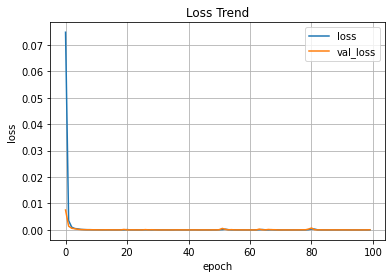

In [17]:
plt.title('Loss Trend')
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(loc='best')
plt.show()

In [18]:
pred=model.predict(x_test)
print(pred.shape)

7/7 [==============================] - 0s 2ms/step
(196, 1)


In [22]:
rand_idx = np.random.randint(0, len(y_test),size=5)
print('random idx = ', rand_idx,'\n')
print('pred = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

random idx =  [171  89  45 101  42] 

pred =  [ 0.05131018 -0.5635094   0.03470543 -0.7796302  -0.11248355]
label =  [ 0.05444167 -0.55845475  0.03820471 -0.7666998  -0.10441169]


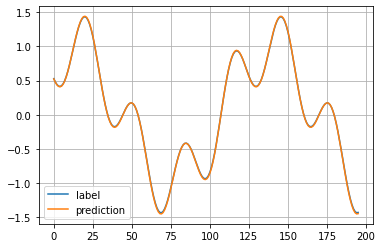

In [23]:
plt.plot(y_test,label='label')
plt.plot(pred,label='prediction')
plt.grid()
plt.legend(loc='best')
plt.show()
#예측과결과가쳡침